# Model Evaluation

This notebook evaluates the trained model:
- Feature importance analysis
- Prediction distribution
- Error analysis
- Model performance visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load model and test data
model = joblib.load("../models/crop_yield_model.pkl")
train_df = pd.read_csv("../models/training_dataset.csv")

feature_columns = [
    'npk_match', 'ph_proximity', 'temp_suitability',
    'rainfall_suitability', 'humidity_suitability', 'soil_match',
    'historical_yield', 'season_alignment', 'regional_success'
]

X = train_df[feature_columns]
y = train_df['suitability_score']

# Make predictions
y_pred = model.predict(X)

print("Model Evaluation on Full Dataset:")
print(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
print(f"MAE: {mean_absolute_error(y, y_pred):.2f}")
print(f"R²: {r2_score(y, y_pred):.4f}")


Model Evaluation on Full Dataset:
RMSE: 12.66
MAE: 6.59
R²: 0.8426



Feature Importance:
                feature  importance
6      historical_yield    0.900798
4  humidity_suitability    0.029836
1          ph_proximity    0.023587
2      temp_suitability    0.019010
3  rainfall_suitability    0.010545
5            soil_match    0.007172
0             npk_match    0.005638
8      regional_success    0.002219
7      season_alignment    0.001196


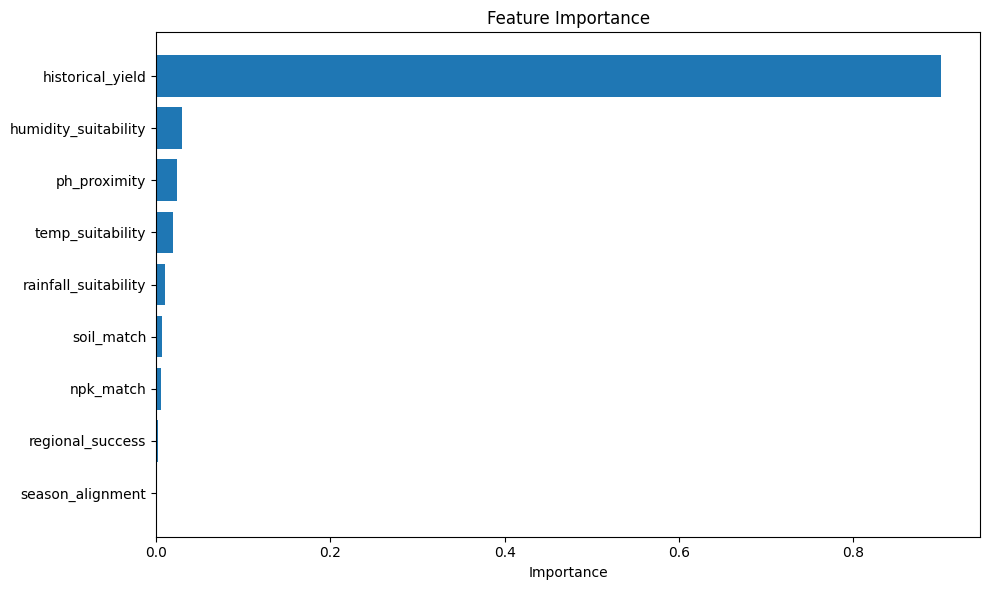

In [2]:
# Feature importance
if hasattr(model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


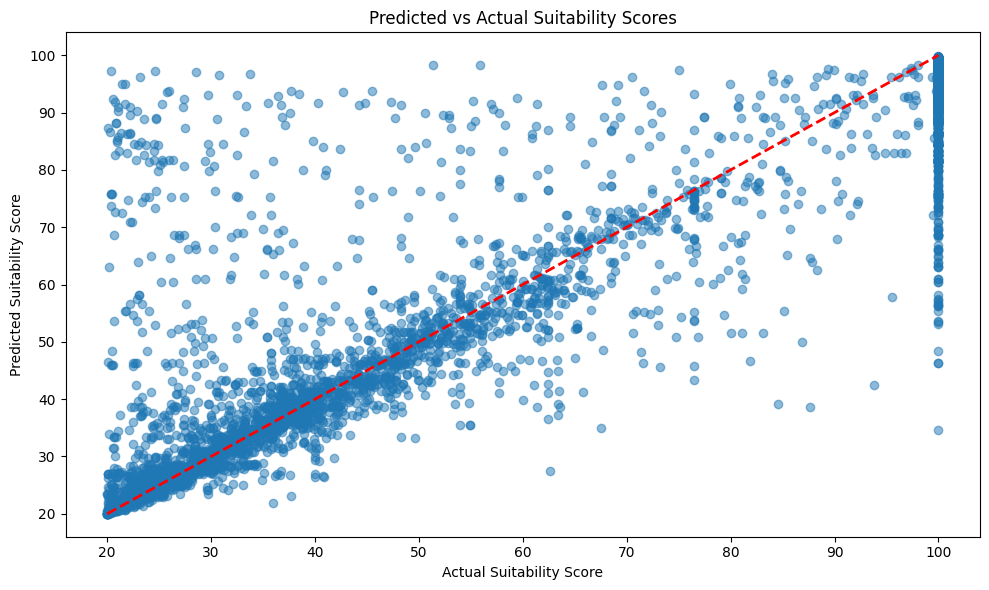

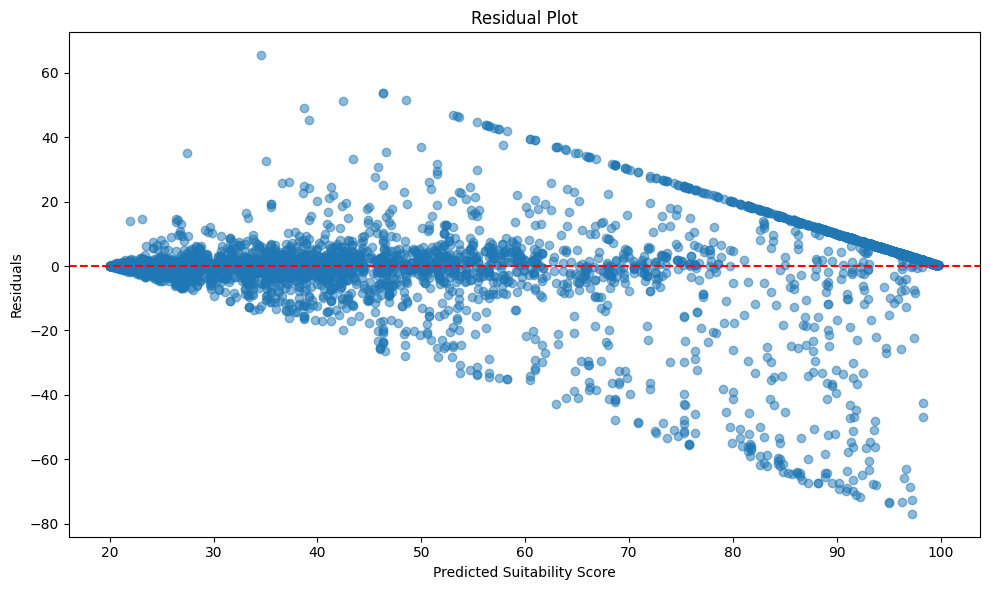

In [3]:
# Prediction vs Actual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Suitability Score')
plt.ylabel('Predicted Suitability Score')
plt.title('Predicted vs Actual Suitability Scores')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Suitability Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()
